<a href="https://colab.research.google.com/github/Samia35-2973/Machine-Learning-Notes/blob/main/identify_digits_using_random_forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import seaborn as sb
from sklearn.metrics import confusion_matrix

In [43]:
digits = load_digits()
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

<Figure size 640x480 with 0 Axes>

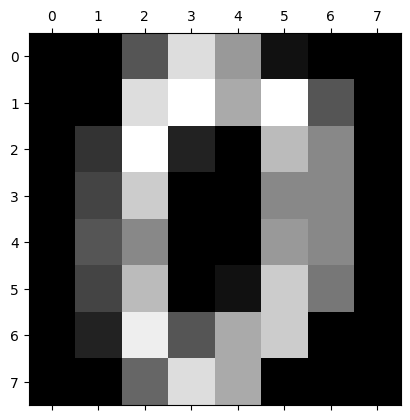

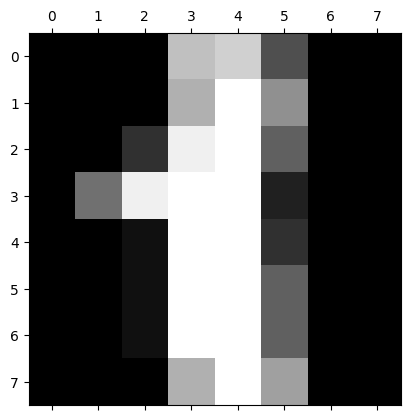

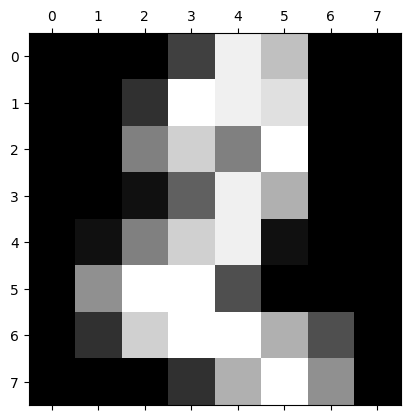

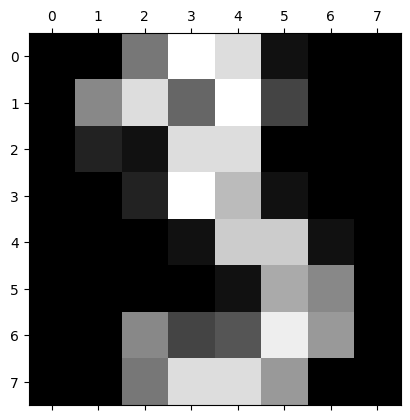

In [44]:
%matplotlib inline
plt.gray()
for i in range(4):
  plt.matshow(digits.images[i])

In [45]:
x = pd.DataFrame(digits.data)
x

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [46]:
from re import X
x['Target'] = digits.target
y = x['Target']
x = x.drop(['Target'], axis='columns')
x

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [47]:
y

0       0
1       1
2       2
3       3
4       4
       ..
1792    9
1793    0
1794    8
1795    9
1796    8
Name: Target, Length: 1797, dtype: int64

In [48]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

We will import from sklearn ensemble. Ensemble is used when we predict from multiple algorithms. Here we are using multiple decision trees.

In [49]:
model = RandomForestClassifier(n_estimators=20)
model.fit(x_train, y_train)

RandomForestClassifier(n_estimators=20)

In [50]:
model.score(x_test, y_test)

0.9694444444444444

There are criterion which can be set to either gini or entropy. Also there is a n_estimators parameter which means how many random decision trees will be used.

In [51]:
predicted_y = model.predict(x_test)

In [52]:
cm = confusion_matrix(y_test, predicted_y)
cm

array([[41,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 32,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0, 41,  0,  0,  0,  0,  0,  0,  1],
       [ 0,  0,  0, 35,  0,  1,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 44,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 34,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0, 30,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 33,  0,  0],
       [ 0,  2,  0,  0,  1,  0,  0,  0, 33,  0],
       [ 0,  0,  0,  2,  0,  0,  0,  0,  1, 26]])

Text(95.72222222222221, 0.5, 'y_test')

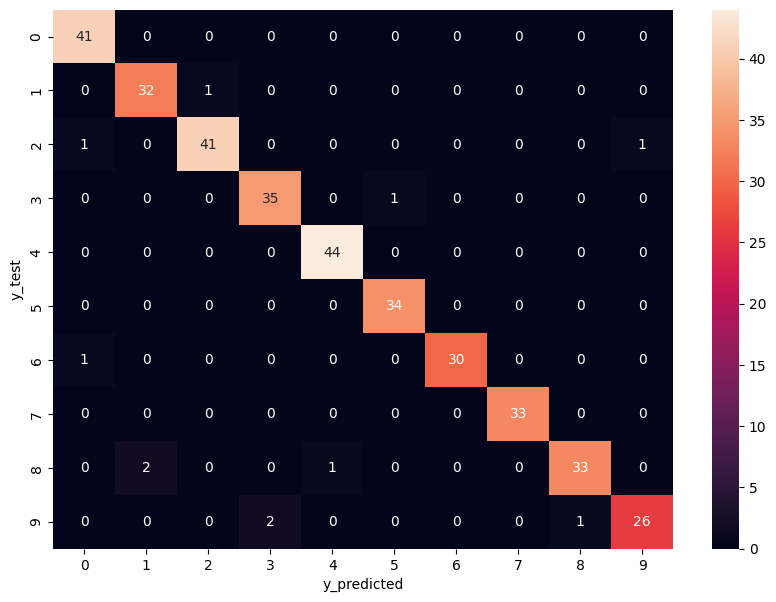

In [53]:
plt.figure(figsize=(10, 7))
sb.heatmap(cm, annot=True)
plt.xlabel('y_predicted')
plt.ylabel('y_test')

There are 33 times 8 was predicted correctly. But 2 times it predicted as 1 and 1 time it predicted as 4.